In [1]:
import os
import numpy as np
import skimage.feature
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.metrics import classification_report

In [2]:
path_train="database/train/"
path_test="database/test/"
folders_train=os.listdir(path_train)
folders_test=os.listdir(path_train)
print(folders_train)

['angry', 'fear', 'surprise', 'disgust', 'neutral', 'sad', 'happy']


In [3]:
lable_list_train=[] # save the emotion lable  [0 'angry', 1'disgust', 2'fear', 3'happy', 4'neutral', 5'sad', 6'surprise']
imgs_train=[] #save the images to train
lable_list_test=[] # save the emotion lable  [0 'angry', 1'disgust', 2'fear', 3'happy', 4'neutral', 5'sad', 6'surprise']
imgs_test=[] #save the images to test

for i in range(len(folders_train)):
    path_emotion_train=path_train+folders_train[i]
    filenames_train=sorted(os.listdir(path_emotion_train))      
    for j in range(len(filenames_train)):
        lable_list_train.append(i)
        img_train=plt.imread(path_emotion_train+"/"+filenames_train[j])
        imgs_train.append(img_train)
for i in range(len(folders_test)):
    path_emotion_test=path_test+folders_test[i]
    filenames_test=sorted(os.listdir(path_emotion_test))      
    for j in range(len(filenames_test)):
        lable_list_test.append(i)
        img_test=plt.imread(path_emotion_test+"/"+filenames_test[j])
        imgs_test.append(img_test)
        
imgs_np_train=np.array(imgs_train)
imgs_np_test=np.array(imgs_test)

In [4]:
print("train dataset:")
print("train/angry number: ",lable_list_train.count(0))
print("train/disgust number: ",lable_list_train.count(1))
print("train/fear number: ",lable_list_train.count(2))
print("train/happy number: ",lable_list_train.count(3))
print("train/neutral number: ",lable_list_train.count(4))
print("train/sad number: ",lable_list_train.count(5))
print("train/surprise number: ",lable_list_train.count(6))
print(" ")
print("test dataset:")
print("test/angry number: ",lable_list_test.count(0))
print("test/disgust number: ",lable_list_test.count(1))
print("test/fear number: ",lable_list_test.count(2))
print("test/happy number: ",lable_list_test.count(3))
print("test/neutral number: ",lable_list_test.count(4))
print("test/sad number: ",lable_list_test.count(5))
print("test/surprise number: ",lable_list_test.count(6))

lable_np_train=np.array(lable_list_train)
lable_np_test=np.array(lable_list_test)

train dataset:
train/angry number:  3995
train/disgust number:  4097
train/fear number:  3171
train/happy number:  436
train/neutral number:  4965
train/sad number:  4830
train/surprise number:  7215
 
test dataset:
test/angry number:  958
test/disgust number:  1024
test/fear number:  831
test/happy number:  111
test/neutral number:  1233
test/sad number:  1247
test/surprise number:  1774


angry
train/angry/Training_34093419.jpg
train/angry/Training_98482160.jpg
train/angry/Training_7213486.jpg
train/angry/Training_84359093.jpg
train/angry/Training_76023642.jpg
fear
train/fear/Training_26423087.jpg
train/fear/Training_60454625.jpg
train/fear/Training_4741176.jpg
train/fear/Training_24144461.jpg
train/fear/Training_69702472.jpg
surprise
train/surprise/Training_14111775.jpg
train/surprise/Training_10466459.jpg
train/surprise/Training_30800277.jpg
train/surprise/Training_11574459.jpg
train/surprise/Training_92666649.jpg
disgust
train/disgust/Training_56958841.jpg
train/disgust/Training_98334760.jpg
train/disgust/Training_27502021.jpg
train/disgust/Training_59161460.jpg
train/disgust/Training_39197750.jpg
neutral
train/neutral/Training_6825500.jpg
train/neutral/Training_68406701.jpg
train/neutral/Training_48729054.jpg
train/neutral/Training_48812595.jpg
train/neutral/Training_14605930.jpg
sad
train/sad/Training_60969561.jpg
train/sad/Training_59844378.jpg
train/sad/Training_

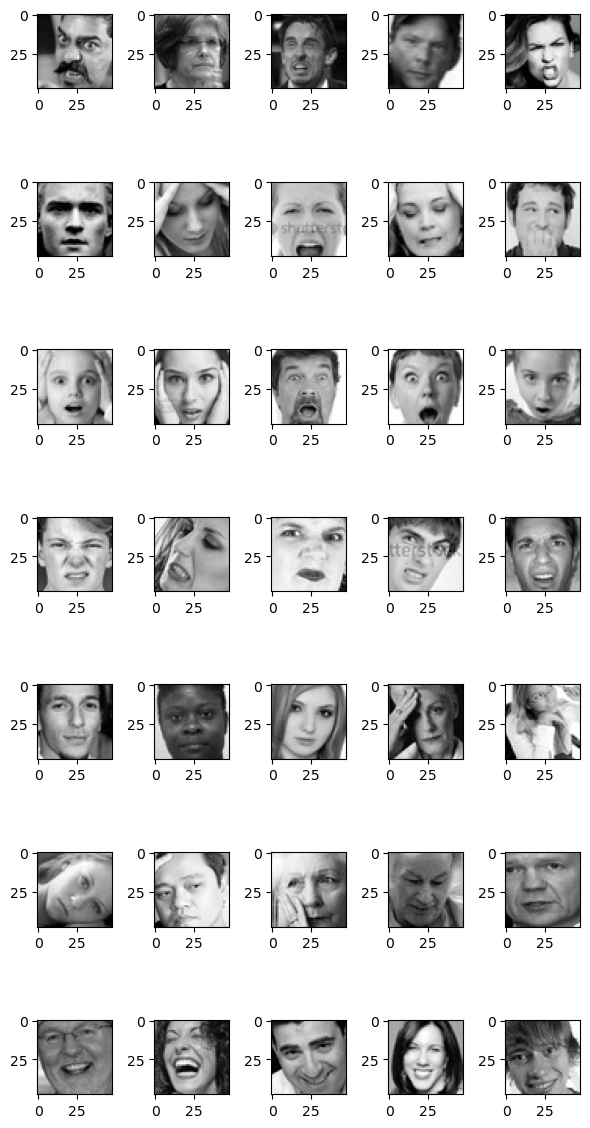

In [5]:
plt.figure(0, figsize=(6,12))
fig_no = 0
for expression in os.listdir("database/train/"):
    print(expression)
    for i in range(1,6):
        fig_no = fig_no + 1
        plt.subplot(7,5,fig_no)
        print("train/" + expression + "/" +os.listdir("database/train/" + expression)[i])
        img = plt.imread("database/train/" + expression + "/" +os.listdir("database/train/" + expression)[i])
        plt.imshow(img, cmap="gray")
plt.tight_layout()
plt.show()


angry
test/angry/PublicTest_26045537.jpg
test/angry/PublicTest_1355981.jpg
test/angry/PublicTest_70289097.jpg
test/angry/PublicTest_49962615.jpg
test/angry/PublicTest_37316865.jpg
fear
test/fear/PublicTest_60996780.jpg
test/fear/PrivateTest_44564903.jpg
test/fear/PublicTest_55429736.jpg
test/fear/PublicTest_59811856.jpg
test/fear/PrivateTest_45279602.jpg
surprise
test/surprise/PrivateTest_48185502.jpg
test/surprise/PrivateTest_8416578.jpg
test/surprise/PrivateTest_60460044.jpg
test/surprise/PrivateTest_83521964.jpg
test/surprise/PrivateTest_84891285.jpg
disgust
test/disgust/PrivateTest_98947037.jpg
test/disgust/PublicTest_43293519.jpg
test/disgust/PublicTest_16053137.jpg
test/disgust/PublicTest_58268614.jpg
test/disgust/PrivateTest_36724992.jpg
neutral
test/neutral/PublicTest_54940641.jpg
test/neutral/PublicTest_57341253.jpg
test/neutral/PrivateTest_14728578.jpg
test/neutral/PublicTest_93473885.jpg
test/neutral/PublicTest_65717627.jpg
sad
test/sad/PrivateTest_43989721.jpg
test/sad/Priv

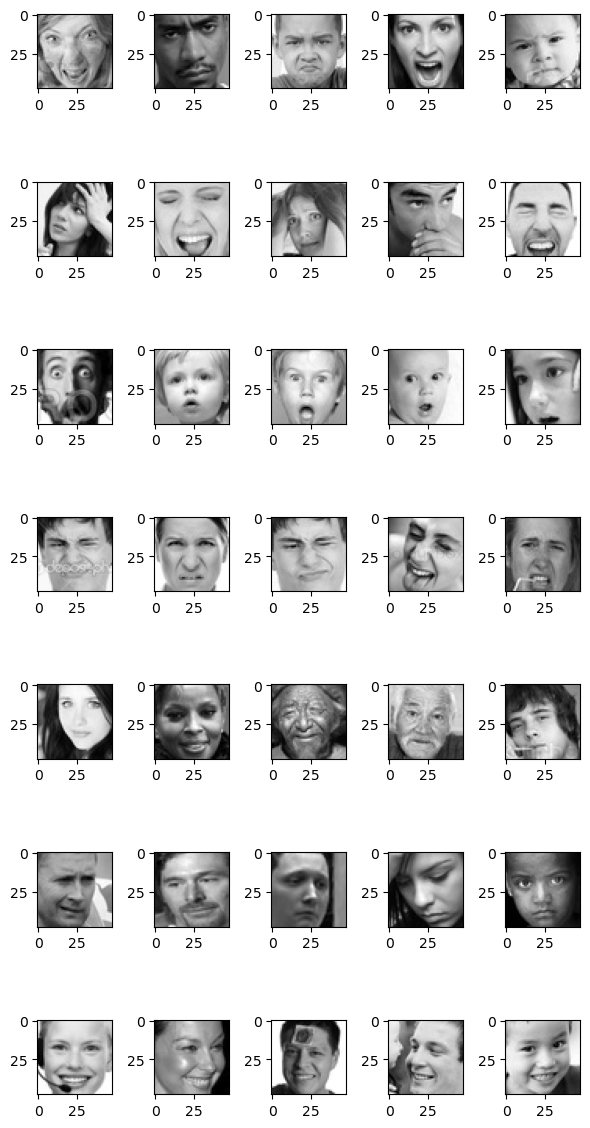

In [6]:
plt.figure(0, figsize=(6,12))
fig_no = 0
for expression in os.listdir("database/test/"):
    print(expression)
    for i in range(1,6):
        fig_no = fig_no + 1
        plt.subplot(7,5,fig_no)
        print("test/" + expression + "/" +os.listdir("database/test/" + expression)[i])
        img = plt.imread("database/test/" + expression + "/" +os.listdir("database/test/" + expression)[i])
        plt.imshow(img, cmap="gray")
plt.tight_layout()
plt.show()


[[5.41477257e+03 5.08359726e+03 5.45254276e+03 ... 6.81728267e+03
  6.97879171e+03 8.21861871e+03]
 [4.68269819e+03 2.23323378e+02 9.86135915e+01 ... 1.05230879e+01
  7.29202789e+00 7.00085547e+03]
 [4.93014843e+03 2.80947322e+02 5.51748625e+01 ... 9.34689776e+00
  1.36637986e+01 6.87401109e+03]
 ...
 [2.84451456e+03 6.66987772e+02 3.34649499e+02 ... 2.32690705e+00
  1.72328013e+00 6.58013255e+02]
 [2.45381821e+03 6.05086075e+02 3.59701647e+02 ... 1.43038103e+00
  1.41790024e+00 6.64613767e+02]
 [2.58062838e+03 3.05146991e+03 4.19957842e+03 ... 6.29892835e+02
  6.43379310e+02 7.79230047e+02]]


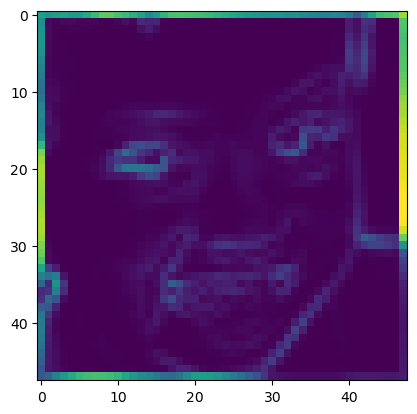

In [7]:
img_lbp_example = skimage.feature.local_binary_pattern(img, 8,1.0,method='var')
print(np.array(img_lbp_example))
# numpy historgram operation
plt.imshow(img_lbp_example)
plt.show()

In [8]:
#Training data
X1 = imgs_np_train
Y1 = lable_np_train
X_train = []
Y_train = []
for i in range(X1.shape[0]):
    x_lbp = skimage.feature.local_binary_pattern(X1[i], 8,1.0,method='var')
    #In order to remove the NaN values
    if np.isnan(x_lbp).any():
        continue
    X_train.append(x_lbp)
    Y_train.append(Y1[i])
X_train = np.array(X_train)
X_train = np.reshape(X_train,(X_train.shape[0],-1))
X_train = preprocessing.normalize(X_train[:],norm='l2')
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

#Testing data
X2 = imgs_np_test
Y2 = lable_np_test
X_test = []
Y_test = []
for i in range(X2.shape[0]):
    x_lbp = skimage.feature.local_binary_pattern(X2[i], 8,1.0,method='var')
    #In order to remove the NaN values
    if np.isnan(x_lbp).any():
        continue
    X_test.append(x_lbp)
    Y_test.append(Y2[i])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],-1))
X_test = preprocessing.normalize(X_test[:],norm='l2')
Y_test = np.array(Y_test)
print(X_test.shape)
print(Y_test.shape)

#We can modify the n_neighbors to check the performance
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, Y_train)
print('Training process is finished succesfully. Starting the testing process...')
Y_pred = clf.predict(X_test)
Y_true = Y_test
target_names = ['class0','class1','class2','class3','class4','class5','class6']
print(classification_report(Y_true,Y_pred,target_names=target_names))

(23774, 2304)
(23774,)
(5969, 2304)
(5969,)
Training process is finished succesfully. Starting the testing process...
              precision    recall  f1-score   support

      class0       0.25      0.28      0.26       771
      class1       0.25      0.30      0.28       854
      class2       0.38      0.42      0.40       673
      class3       0.27      0.26      0.27        95
      class4       0.27      0.28      0.27      1016
      class5       0.29      0.21      0.25      1023
      class6       0.38      0.37      0.37      1537

    accuracy                           0.31      5969
   macro avg       0.30      0.30      0.30      5969
weighted avg       0.31      0.31      0.31      5969

